<a href="https://colab.research.google.com/github/prajesh-pixel/img_compress/blob/main/image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

In [ ]:
!ls '/content/drive/My Drive/test_image/'

2532679.jpg


In [ ]:
IMG_PATH='/content/drive/My Drive/test_image/'

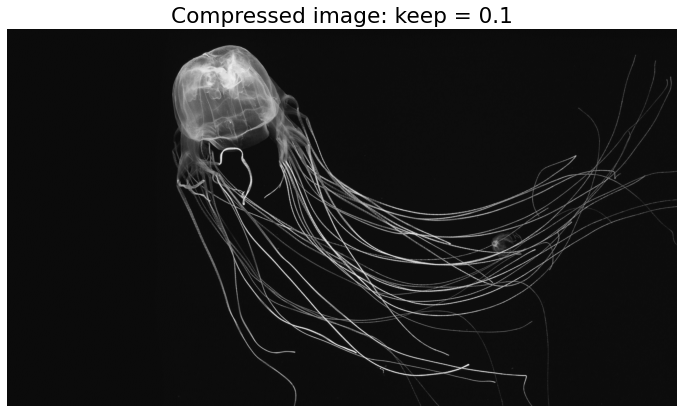

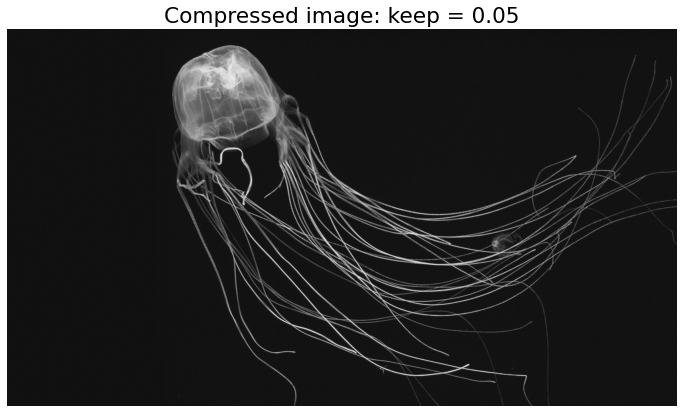

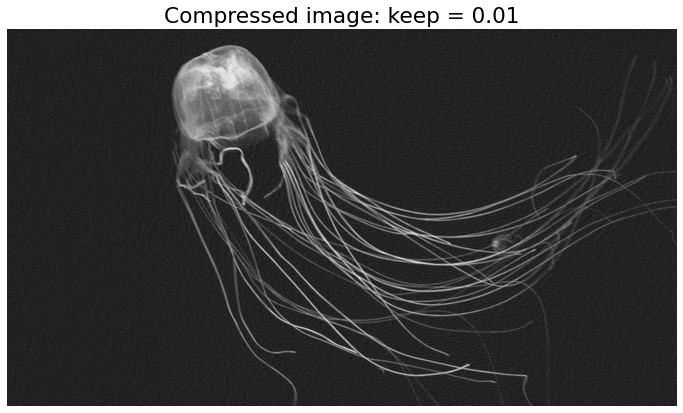

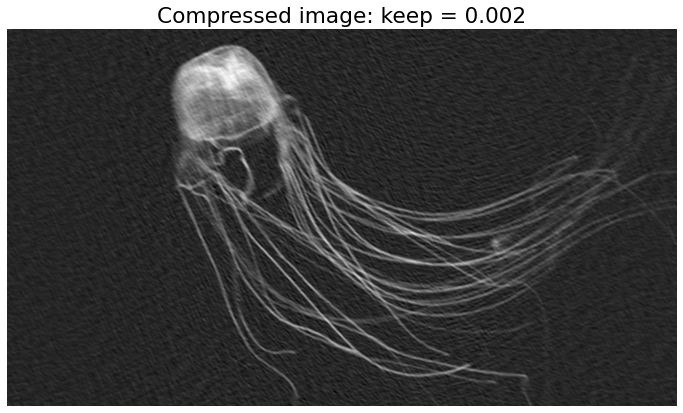

In [ ]:
A = imread(os.path.join(IMG_PATH,'2532679.jpg'))
# Abw = np.mean(A, -1); # Convert RGB to grayscale

# plt.imshow(Abw,cmap='gray')
# plt.axis('off')
# plt.show()

B = np.mean(A, -1); # Convert RGB to grayscale

Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

# Zero out all small coefficients and inverse transform
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh          # Find small indices
    Atlow = Bt * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep))

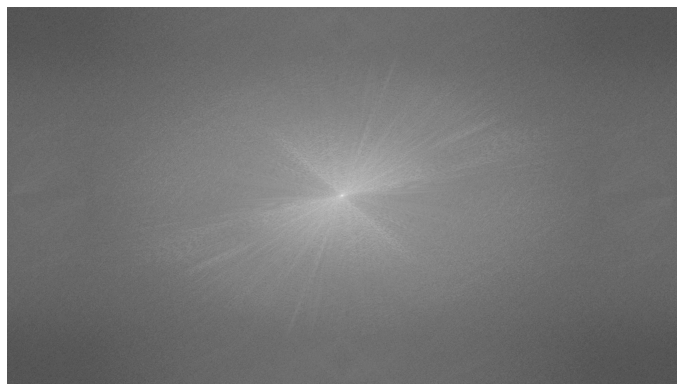

In [ ]:
# ## Compute FFT of image using fft2
# At = np.fft.fft2(Abw)
# F = np.log(np.abs(np.fft.fftshift(At))+1) # Put FFT on log scale
# plt.imshow(F,cmap='gray')
# plt.axis('off')
# plt.show()

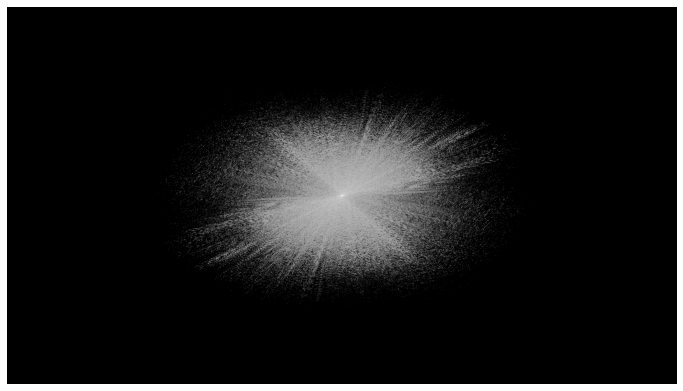

In [ ]:
# ## Zero out all small coefficients and inverse transform
# Bt = np.sort(np.abs(np.reshape(At,-1)))
# keep = 0.1
# thresh = Bt[int(np.floor((1-keep)*len(Bt)))]
# ind = np.abs(At) > thresh
# Atlow = At * ind
# Flow = np.log(np.abs(np.fft.fftshift(Atlow))+1) # Put FFT on log scale

# plt.imshow(Flow,cmap='gray')
# plt.axis('off')
# plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


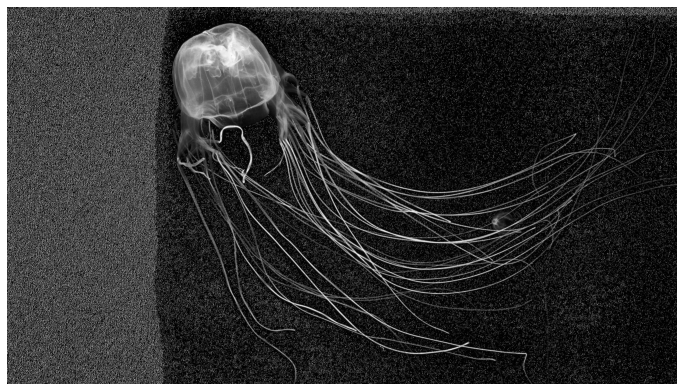

In [ ]:
# ## Plot Reconstruction
# Alow = np.fft.ifft2(Atlow).astype('uint8')

# plt.imshow(Alow,cmap='gray')
# plt.axis('off')
# plt.show()